# In class exercise...
* MI is biased in that small sample sizes lead to inaccurate estimates of PDFs, and that can sometimes lead to negative MI values (which should never happen in theory). 
* A common, and simple, approach, is to compute MI with shuffled condition labels (like randomization tests that we did many weeks back) and then subtract the shuffled MI from the actual MI. 

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## First set up two arrays of data...make them correlated to some degree so that there is a reasonably high MI...

In [2]:
N = 100  # number of data points
x = np.array(np.random.rand(N)*10,dtype=int)
y = np.array(x+np.random.rand(N),dtype=int)
print(x)
print(y)

[3 1 4 3 0 1 3 8 8 6 2 9 7 4 4 9 7 3 2 7 3 7 1 1 4 5 7 6 1 1 4 3 7 7 9 6 8
 6 7 0 9 0 6 2 1 4 2 3 2 6 6 6 4 6 4 6 4 8 3 7 2 4 9 6 6 4 5 7 8 6 6 8 6 4
 2 6 9 1 5 9 2 1 1 8 8 4 0 3 3 6 5 0 4 5 5 4 4 1 4 1]
[3 1 4 3 0 1 3 8 8 6 2 9 7 4 4 9 7 3 2 7 3 7 1 1 4 5 7 6 1 1 4 3 7 7 9 6 8
 6 7 0 9 0 6 2 1 4 2 3 2 6 6 6 4 6 4 6 4 8 3 7 2 4 9 6 6 4 5 7 8 6 6 8 6 4
 2 6 9 1 5 9 2 1 1 8 8 4 0 3 3 6 5 0 4 5 5 4 4 1 4 1]


## Then compute the MI between the arrays. Can do two discrete arrays for simplicity, and import the entropy and conditional entropy functions from the tutorial.

In [3]:
def entropy(x):
    """compute entropy of discrete array x

    Args:
        x (int): array of discrete values

    Returns:
        Hx (float): entropy of x

    """
    # figure out unique values of x - can be more than just 0s, 1s
    uniquex = np.unique(x)

    Hx = 0
    for i in np.arange(len(uniquex)):
        # probability that x==uniquex[i]
        px = np.sum(x==uniquex[i])/len(x)    

        # check for px==0 because log2(0) = -inf
        if px!=0:
            Hx += (-np.sum( px * np.log2(px) ))  
        else:
            print('px is zero for value ', i)
        
    return Hx

def condEntropy(x,y):
    
    """
    conditional entropy, or the average entropy of x given each y, or Hxy
    1) For all Y {i=1:numel(X)}, compute the entropy of X given each Y
    2) Multiply H(X|Y==i) with the probability of each Y (i.e. pxi)
    3) Sum over all i

    Args:
        x (int): array of discrete values
        y (int): array of discrete values
        
    Returns:
        Hxy (float): average conditional entropy of x given y

    """

    Hxy=0
    uniquex = np.unique(x)
    uniquey = np.unique(y)

    # loop over unique elements of y
    for i in np.arange(len(uniquey)): 

        # probability that y==y(i) (prob of each y)
        py = np.sum(y==uniquey[i]) / N

        # then loop over all possible x's to compute entropy of x at each y
        tmp=0
        for j in np.arange(len(uniquex)):
            px_y = np.sum((x==uniquex[j]) & (y==uniquey[i])) / np.sum(y==uniquey[i])    # e.g. prob x==1 when y==0
            tmp += (-( px_y * np.log2(px_y) ))                                     # entropy      

        # then tally up entropy of x given each specific y multiplied by the probability of that y (py)
        Hxy += py*tmp

    return Hxy

Hx = entropy(x=x)
Hxy = condEntropy(x=x,y=y)
print('MI is: ', Hx-Hxy)

MI is:  nan


/Users/desichu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log2
/Users/desichu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars


In [4]:
N = 1000   # number of data points
x = np.round(np.random.rand(N))
y = np.round(np.random.rand(N))

corrN = 5000
for i in np.arange(corrN):
    rand = np.random.randint(1,501)
    y[rand] = x[rand]

temp = 0
for j in np.arange(N):
    if x[j] == y[j]:
        temp += 1
print("Equal values:", temp)

np.corrcoef(x,y)

Equal values: 726


array([[1.        , 0.45183301],
       [0.45183301, 1.        ]])

In [5]:
Hx = entropy(x=x)
Hxy = condEntropy(x=x,y=y)
print('MI is: ', Hx-Hxy)

MI is:  0.15271718734013084


## Now repeat the above operations, but shuffle the data arrays and repeat the analysis many times (~500-1000 times). Plot the distribution of MI values that you get.

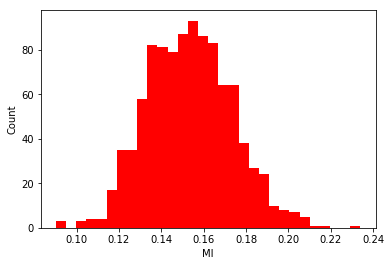

In [7]:
num_bootstraps = 1000
MI = np.zeros(num_bootstraps)

for i in np.arange(num_bootstraps):
    # with replacement generate a sample number from 0:N exclusive and do that N times
    index = np.random.randint(N, size=N)

    # use that to pull data from each of our arrays
    tmp1 = x[index]
    tmp2 = y[index]
    
    # compute correlation
    Hx = entropy(x=tmp1)
    Hxy = condEntropy(x=tmp1,y=tmp2)
    MI[i] = Hx-Hxy
    
# then compute 95% CIs based on percentiles 
CIs = np.percentile(corrN, [2.5, 97.5])

# histogram it
plt.hist(MI, color='r', alpha=1, bins=30)
plt.xlabel('MI')
plt.ylabel('Count')
plt.show()

## Now subtract the mean of the shuffled MI values from your 'real' MI value...this will help correct for any bias that is introduced by a limited sample size

In [8]:
print("Mean MI:", np.mean(MI))

print("Difference:", Hx-Hxy - np.mean(MI))

Mean MI: 0.15355770090739224
Difference: -0.02095303359827766
